# Machine Learning Project<br>
Martino **De Nardi** - 1206029

# Comparison of the performances of different classifiers

In this Notebook we want to compare the difference in terms of quality of prediction between different classifiers using a dataset with ~18K instances and 8 features, plus the binary target feature (0/1).<br>
In order to do it, we want to assess which are the best hyperparameters for a specific classifier (given the dataset) and then use that model to predict the test data. Finally, we want to compare the result of the different classifier, taking into account pros/cons that characterize them (quality of the prediction in terms of error, time to train the model, etc).

## Dataset

This dataset describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium and states of matter.

As pulsars rotate, their emission beam sweeps across the sky and when this crosses our line of sight produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate datasets as binary classification problems.

The 1.639 real pulsar stars examples (class=1) have all been checked by human annotators.
Each row lists the variables first and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve. These are summarised below:
<br>
1 - Mean of the integrated profile.<br>
2 - Standard deviation of the integrated profile.<br>
3 - Excess kurtosis of the integrated profile.<br>
4 - Skewness of the integrated profile.<br>
5 - Mean of the DM-SNR curve.<br>
6 - Standard deviation of the DM-SNR curve.<br>
7 - Excess kurtosis of the DM-SNR curve.<br>
8 - Skewness of the DM-SNR curve.<br>
9 - Class (0/1)

First of all we import all the necessary libraries and the dataset (.csv file).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
import warnings
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split, RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
np.random.seed(43)

In [2]:
warnings.filterwarnings("ignore")

In [3]:
stars=pd.read_csv("pulsar_stars.csv")

In [4]:
# Print the dimension of the dataset
stars.shape

(17898, 9)

In [5]:
# Print the first 5 rows of the dataset
stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
# Info method to get an overview of the data
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
# Check fot NULL values
print(stars.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [8]:
# Summarize the values of the most important statistics for each feature
stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


We notice that we don't have NULL/missing data.<br>
Then we define the matrix X of the feature and the target column y.

In [9]:
X = stars.drop('target_class', axis=1)  
y = stars['target_class'] 

We explore the data graphically to get a better idea of their distribution/correlations.

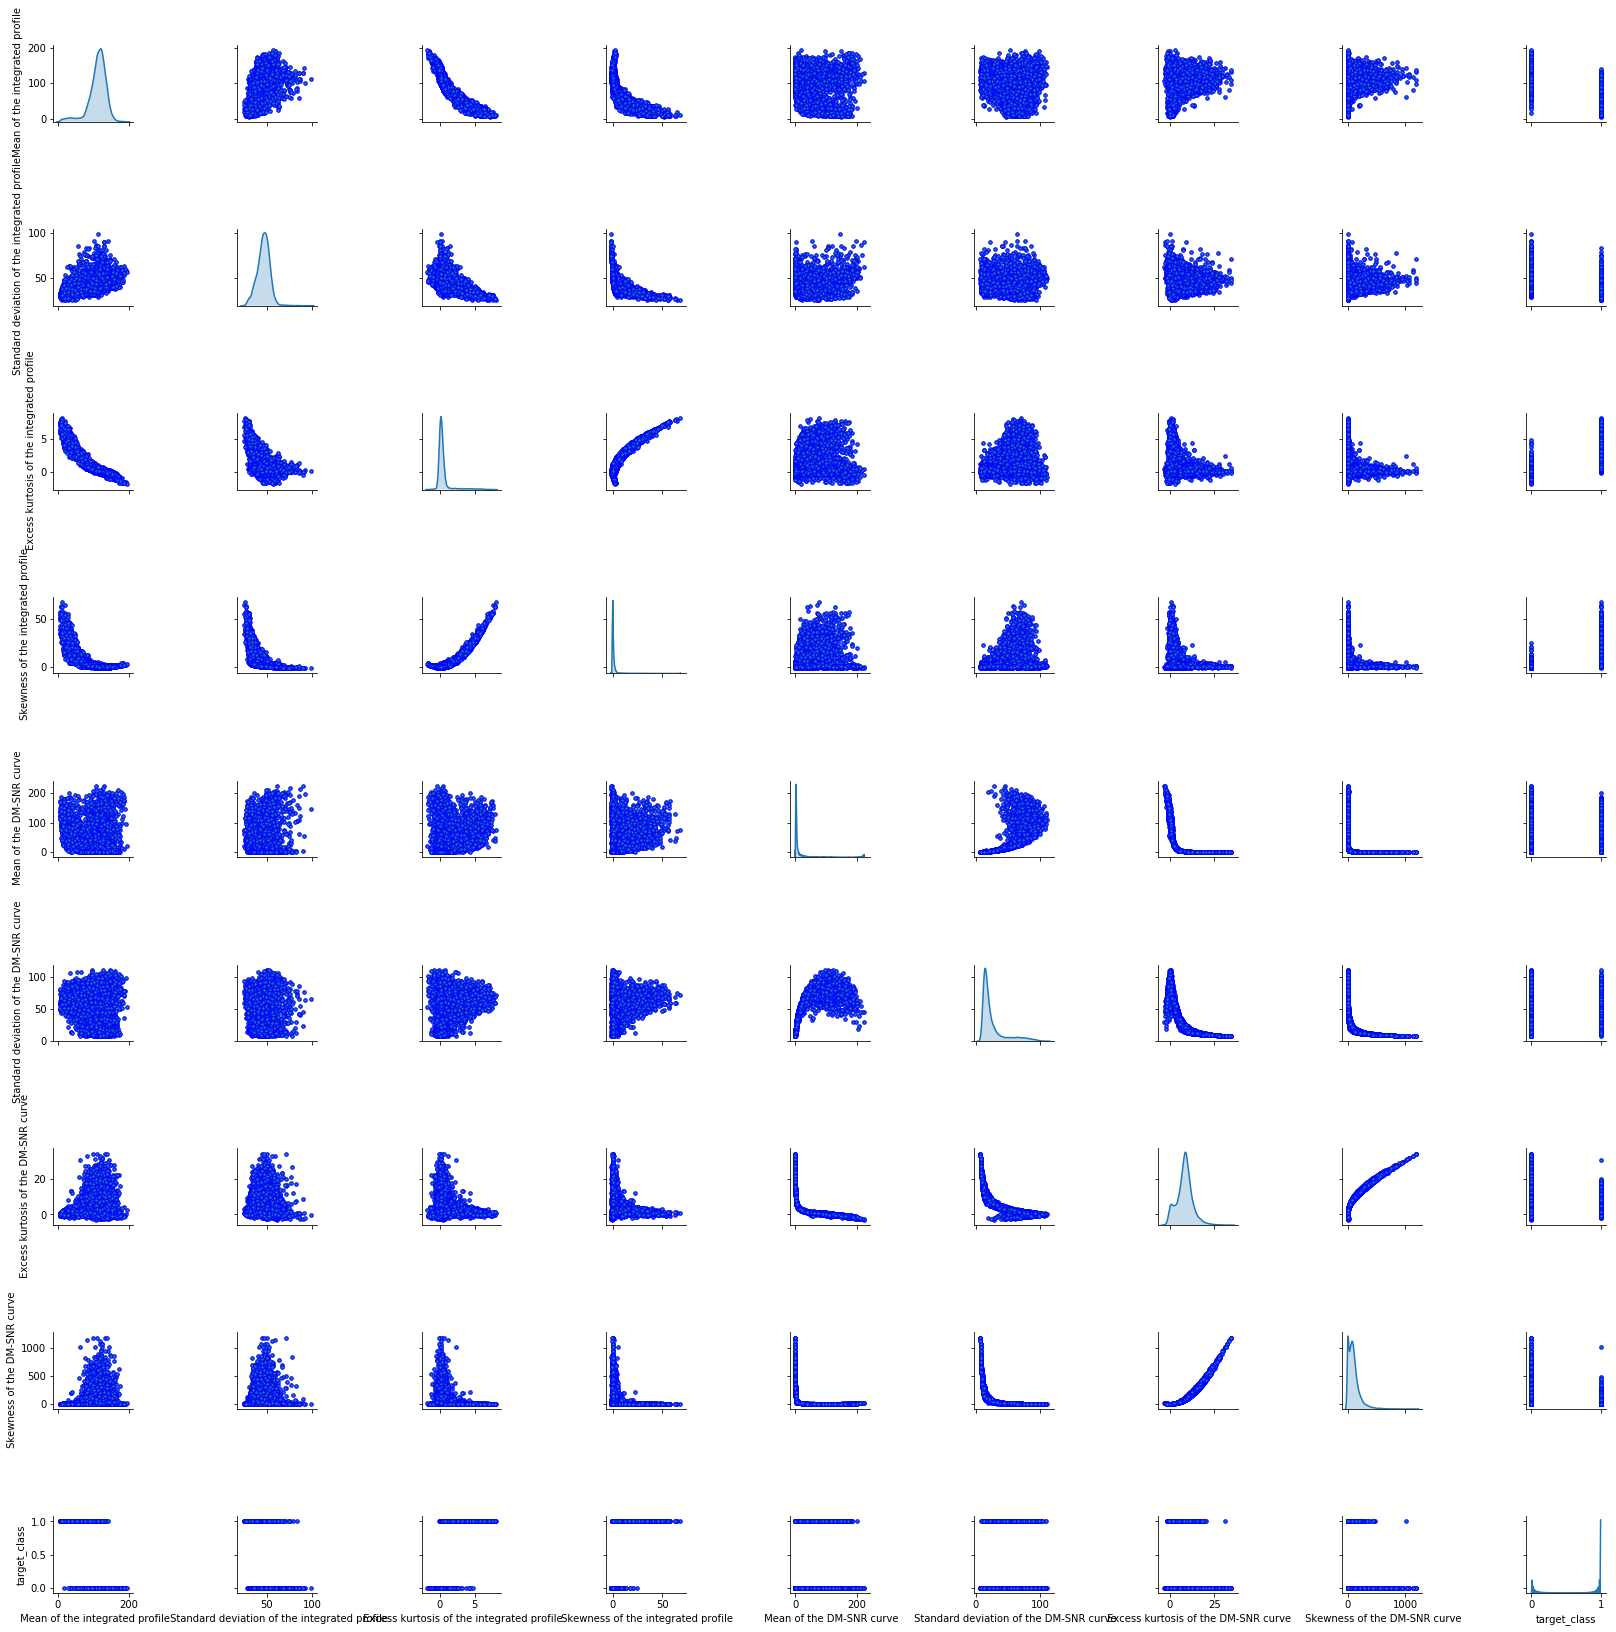

In [10]:
# Pairplot to visualize the relationship between each possible couple of variables
sns.pairplot(data=stars,
             diag_kind="kde",
             markers=".",
             plot_kws=dict(s=50, edgecolor="b", linewidth=1)
            )

plt.show() 

We plot the correlation matrix to understand which are the most correlated features w.r.t. the target feature and if there is collinearity between independent variables.

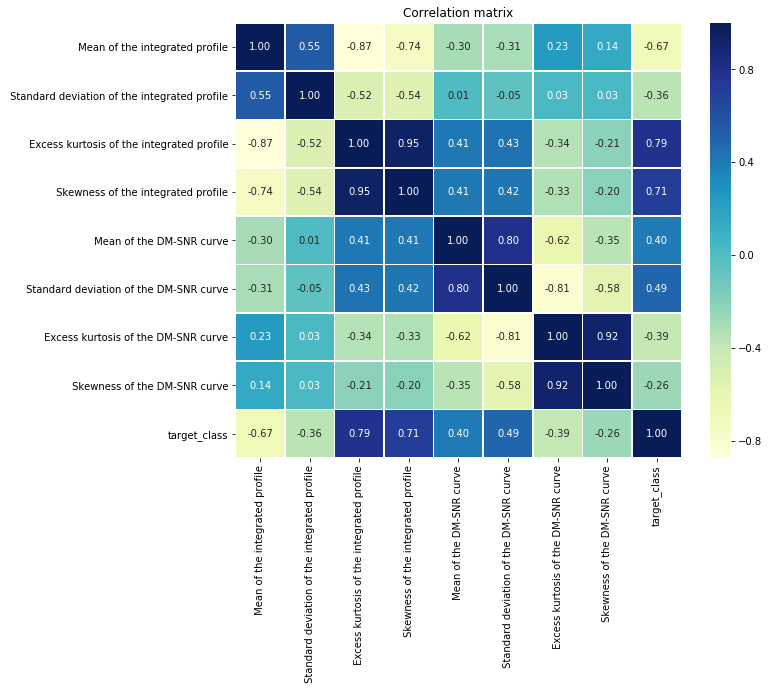

In [11]:
# Correlation matrix to see the correlation between each pair of variables

f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(stars.corr(), annot=True, linewidths=.5, cmap="YlGnBu",fmt= '.2f',ax=ax)
plt.title('Correlation matrix')
plt.show()

We can notice that the excess kurtosis of the integrated profile and the skewness of the integrated profile are quite correlated with the target class, while the opposite occurs for the mean of the integrated profile and standard deviation of the integrated profile, that are anti-correlated with the response variable.<br>
Anyway, a collinearity can be identified (also looking at the pairplot) between excess kurtosis of the integrated profile and the skewness of the integrated profile, so it's quite obvious they have a similar correlation wrt to the target class. This phenomenon is present also between skewness of the DM-SNR curve - excess kurtosis of the DM-SNR curve and standard deviation of the DM-SNR curve - mean of the DM-SNR curve.<br>

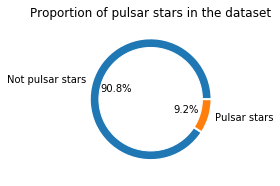

In [12]:
# Check for the distribution of the target class

plt.subplot(122)
plt.pie(stars["target_class"].value_counts().values,
        labels=["Not pulsar stars","Pulsar stars"],
        autopct="%1.1f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.85,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of pulsar stars in the dataset")
plt.show()

Proportion of positive examples = 9.16%


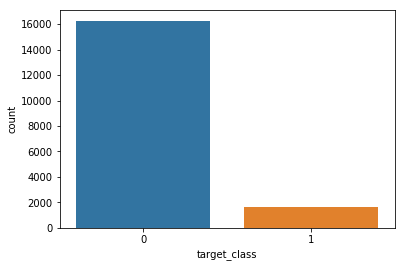

In [13]:
# Proportion of 1s over the total number of examples

sns.countplot(stars.target_class)
print("Proportion of positive examples = {}%".format(round(sum(y==1)/len(y)*100,2)))

Now we want to split our data into a part for the training (80%) and another one for the test (20%).

In [14]:
np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43, shuffle=True, stratify=y)  

# Models

Now we switch to the part of model construction and evaluation. <br>
We try different models and we perform a cross validation for the selection of the hyperparameters. To do this, we use GridSearchCV and RandomizedSearchCV functions that make several trials using different combinations of hyperparameters from the given intervals (GridSearch, which tries all possible combinations, is used only when the processing time is quite low/reasonable).<br>
Since the dataset is highly unbalanced w.r.t. the distribution of the target class (as we have seen during the explorative data analysis), we want to access the quality of the prediction using the MCC (Matthews correlation coefficient) as metric.
In fact, the number of 1s in the target column is less then 10% of the total.

We recall that the MCC is defined from the confusion matrix in the following way:<br><br><br>
$$MCC = \frac{(TN x TP)-(FN x FP)}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$$<br>

In [15]:
# Define the scorer based on MCC
mcc_scorer = make_scorer(matthews_corrcoef)

## MLPClassifier

### Evaluation of best hyperparameters

Each time we want to assess the best hyperparameters for a given model, we start by defining the dictionary where the keys are the parameters of that model and the associated values are all the possible values to use in the search for that parameter. <br>
Then we fit the model and, once the best hyperparameters are found, we print them.<br>
We always print also the time of the execution, which is very different between the models.

In [16]:
start=time.time()
# Define the model and the maximum number of iterations (that we keep fixed)
mlp = MLPClassifier(max_iter=2000)

# Define the parameter space
parameter_space = {
    'hidden_layer_sizes': [(10),(20),(10,10),(10,10,10),(10,20,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [1e-3,1e-6],
    'learning_rate': ['constant','adaptive']
}

# Perform the search with some of the possible combinations 
# n_iter is the number of parameter settings that are sampled: it trades off runtime vs quality of the solution
mlp_clf = RandomizedSearchCV(mlp, parameter_space, cv=5, n_iter=10, scoring=mcc_scorer, n_jobs=-1, random_state=1)
mlp_clf.fit(X_train, y_train)

end=time.time()
print("Total time of execution: {} seconds".format(end - start))

Total time of execution: 64.871089220047 seconds


In [17]:
# Print the best parameters 
print('Best parameters found for MultiLayer Perceptron Classifier:\n', mlp_clf.best_params_)

Best parameters found for MultiLayer Perceptron Classifier:
 {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 20, 'alpha': 0.001, 'activation': 'relu'}


We can also ask for the result of each trial performed over one of the possible combinations of hyperparameters.

In [18]:
# Print the mean test score and the standard deviation for each trial
means = mlp_clf.cv_results_['mean_test_score']
stds = mlp_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" % (mean, std * 2, params))

0.841 (+/-0.0338) for {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 10, 'alpha': 1e-06, 'activation': 'relu'}
0.845 (+/-0.0328) for {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 20, 'alpha': 1e-06, 'activation': 'tanh'}
0.851 (+/-0.0297) for {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10, 10), 'alpha': 1e-06, 'activation': 'tanh'}
0.840 (+/-0.0393) for {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10), 'alpha': 1e-06, 'activation': 'relu'}
0.840 (+/-0.0326) for {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 20, 'alpha': 0.001, 'activation': 'relu'}
0.852 (+/-0.0467) for {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 20, 'alpha': 0.001, 'activation': 'relu'}
0.843 (+/-0.0499) for {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.001, 'activation': 'relu'}
0.836 (+/-0.0414) for {'solver': 'sgd', '

Now that all the parameters are established, we want to use the test set (never used so far) to make prediction and compare them to the real values.

### Model evaluation

Results on the test set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.97      0.80      0.88       328

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.98      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



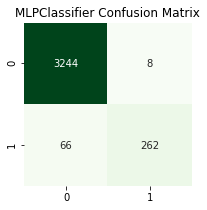


MCC = 0.8699698210796533


In [19]:
# Calculate the prediction and the most important metrics
y_true, y_pred_mlp = y_test , mlp_clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred_mlp))

plt.figure(figsize=(3,3))
plt.title("MLPClassifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_true, y_pred_mlp),cbar=False,annot=True,cmap="Greens",fmt="d")
plt.show()

print()
print("MCC = {}".format(matthews_corrcoef(y_test, y_pred_mlp)))

## Support Vector Classifier

### Evaluation of best hyperparameters

Before starting the procedure, we scale the data to reduce the time of the computation. In fact, without reducing the time required for the processing of the data is really, really high! 

In [21]:
# We standardize the training and test set for computational time reasons in SVM
scaler = MinMaxScaler() 
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

In [22]:
start=time.time()

svm = SVC(max_iter=6000)
parameters = {'kernel':('linear', 'rbf','poly'), 
              'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'gamma': (1,2,3,'auto'),
              'shrinking':(True, False)}
svc_clf = RandomizedSearchCV(svm, parameters, cv=5, n_iter=10, scoring=mcc_scorer, n_jobs=-1, random_state=1)
svc_clf.fit(X_train_scal,y_train)

end=time.time()
print("Total time of execution: {} seconds".format(end - start))

Total time of execution: 11.723395109176636 seconds


In [23]:
print('Best parameters found for SVC:\n', svc_clf.best_params_)

Best parameters found for SVC:
 {'shrinking': True, 'kernel': 'poly', 'gamma': 3, 'C': 0.4}


In [24]:
#print the mean test score and the standard deviation for each trial
means = svc_clf.cv_results_['mean_test_score']
stds = svc_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svc_clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" % (mean, std * 2, params))

0.839 (+/-0.0240) for {'shrinking': True, 'kernel': 'linear', 'gamma': 3, 'C': 1}
0.848 (+/-0.0325) for {'shrinking': True, 'kernel': 'rbf', 'gamma': 1, 'C': 0.9}
0.860 (+/-0.0299) for {'shrinking': True, 'kernel': 'poly', 'gamma': 3, 'C': 0.4}
0.193 (+/-0.0579) for {'shrinking': False, 'kernel': 'poly', 'gamma': 'auto', 'C': 0.4}
0.437 (+/-0.0488) for {'shrinking': True, 'kernel': 'poly', 'gamma': 'auto', 'C': 0.9}
0.781 (+/-0.0278) for {'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'C': 0.1}
0.814 (+/-0.0282) for {'shrinking': False, 'kernel': 'rbf', 'gamma': 'auto', 'C': 0.4}
0.832 (+/-0.0361) for {'shrinking': False, 'kernel': 'rbf', 'gamma': 1, 'C': 0.2}
0.847 (+/-0.0362) for {'shrinking': True, 'kernel': 'rbf', 'gamma': 1, 'C': 0.8}
0.831 (+/-0.0239) for {'shrinking': False, 'kernel': 'rbf', 'gamma': 'auto', 'C': 1}


### Model evaluation

Results on the test set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3252
           1       0.99      0.21      0.34       328

   micro avg       0.93      0.93      0.93      3580
   macro avg       0.96      0.60      0.65      3580
weighted avg       0.93      0.93      0.90      3580



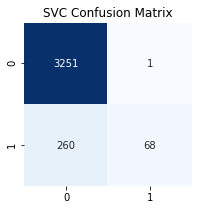


MCC = 0.4343728313304928


In [25]:
# Calculate the prediction and the most important metrics
y_true, y_pred_svc = y_test, svc_clf.predict(X_test)


print('Results on the test set:')
print(classification_report(y_true, y_pred_svc))

plt.figure(figsize=(3,3))
plt.title("SVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_true, y_pred_svc),cbar=False,annot=True,cmap="Blues",fmt="d")
plt.show()

print()
print("MCC = {}".format(matthews_corrcoef(y_test, y_pred_svc)))

## Random Forest

### Evaluation of best hyperparameters

In [26]:
start=time.time()

rf = RandomForestClassifier()

parameter_space = {
    'n_estimators': randint(10,300),
    'criterion': ['gini','entropy']
}

rf_clf = RandomizedSearchCV(rf, parameter_space, cv=5, n_iter=10, scoring=mcc_scorer, n_jobs=-1, random_state=1)
rf_clf.fit(X_train, y_train)

end=time.time()
print("Total time of execution: {} seconds".format(end - start))

Total time of execution: 71.39311599731445 seconds


In [27]:
print('Best parameters found for Random Forest Classifier:\n', rf_clf.best_params_)

Best parameters found for Random Forest Classifier:
 {'criterion': 'gini', 'n_estimators': 82}


In [28]:
#print the mean test score and the standard deviation for each trial
means = rf_clf.cv_results_['mean_test_score']
stds = rf_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rf_clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" % (mean, std * 2, params))

0.871 (+/-0.0320) for {'criterion': 'entropy', 'n_estimators': 245}
0.873 (+/-0.0308) for {'criterion': 'gini', 'n_estimators': 82}
0.871 (+/-0.0296) for {'criterion': 'entropy', 'n_estimators': 213}
0.871 (+/-0.0285) for {'criterion': 'entropy', 'n_estimators': 154}
0.869 (+/-0.0246) for {'criterion': 'entropy', 'n_estimators': 81}
0.872 (+/-0.0304) for {'criterion': 'entropy', 'n_estimators': 291}
0.873 (+/-0.0284) for {'criterion': 'gini', 'n_estimators': 286}
0.872 (+/-0.0261) for {'criterion': 'gini', 'n_estimators': 262}
0.871 (+/-0.0280) for {'criterion': 'gini', 'n_estimators': 166}
0.867 (+/-0.0338) for {'criterion': 'entropy', 'n_estimators': 60}


### Model evaluation

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3252
           1       0.96      0.85      0.90       328

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.92      0.95      3580
weighted avg       0.98      0.98      0.98      3580



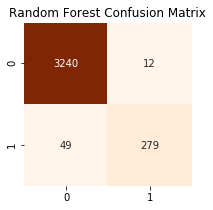


MCC = 0.8940792255903796


In [29]:
y_pred_rf=rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(3,3))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_true, y_pred_rf),cbar=False,annot=True,cmap="Oranges",fmt="d")
plt.show()

print()
print("MCC = {}".format(matthews_corrcoef(y_test, y_pred_rf)))

## Gaussian Naive Bayes

### Evaluation of best hyperparameters

In [30]:
start=time.time()

parameter_space = {
    'var_smoothing': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]
}

nb = GaussianNB() 
nb_clf = GridSearchCV(nb, parameter_space, cv=5, scoring=mcc_scorer)
nb_clf.fit(X_train, y_train)

end=time.time()
print("Total time of execution: {} seconds".format(end - start))

Total time of execution: 0.6453649997711182 seconds


In [31]:
print('Best parameters found for Naive Bayes Classifier:\n', nb_clf.best_params_)

Best parameters found for Naive Bayes Classifier:
 {'var_smoothing': 1e-07}


In [32]:
#print the mean test score and the standard deviation for each trial
means = nb_clf.cv_results_['mean_test_score']
stds = nb_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, nb_clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" % (mean, std * 2, params))

0.703 (+/-0.0386) for {'var_smoothing': 1e-09}
0.703 (+/-0.0386) for {'var_smoothing': 1e-08}
0.704 (+/-0.0390) for {'var_smoothing': 1e-07}
0.703 (+/-0.0383) for {'var_smoothing': 1e-06}
0.701 (+/-0.0364) for {'var_smoothing': 1e-05}
0.691 (+/-0.0421) for {'var_smoothing': 0.0001}


### Model evaluation

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.75      0.86      0.80       328

   micro avg       0.96      0.96      0.96      3580
   macro avg       0.87      0.92      0.89      3580
weighted avg       0.96      0.96      0.96      3580



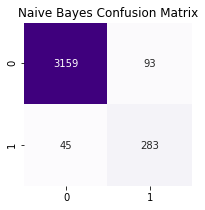


MCC = 0.7849570454450286


In [33]:
y_true=y_test
y_pred_nb=nb_clf.predict(X_test)
print(classification_report(y_true, y_pred_nb))

plt.figure(figsize=(3,3))
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(confusion_matrix(y_true, y_pred_nb),cbar=False,annot=True,cmap="Purples",fmt="d")
plt.show()

print()
print("MCC = {}".format(matthews_corrcoef(y_test, y_pred_nb)))

## KNN

### Evaluation of best hyperparameters

In [37]:
start=time.time()

neigh = KNeighborsClassifier(algorithm = 'auto')
parameters = {'n_neighbors': randint(3,10),
              'weights':['uniform','distance'],
              'p':[1,2]}
knn_clf = RandomizedSearchCV(neigh, parameters, cv=5, n_iter=20, scoring=mcc_scorer, n_jobs=-1, random_state=1)
knn_clf.fit(X_train,y_train)

end=time.time()
print("Total time of execution: {} seconds".format(end - start))

Total time of execution: 7.186220645904541 seconds


In [38]:
print('Best parameters found for KNN:\n', knn_clf.best_params_)

Best parameters found for KNN:
 {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [39]:
#print the mean test score and the standard deviation for each trial
means = knn_clf.cv_results_['mean_test_score']
stds = knn_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, knn_clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" % (mean, std * 2, params))

0.823 (+/-0.0323) for {'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
0.815 (+/-0.0371) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.821 (+/-0.0370) for {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
0.828 (+/-0.0356) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.822 (+/-0.0328) for {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
0.828 (+/-0.0333) for {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.824 (+/-0.0365) for {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.826 (+/-0.0220) for {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
0.829 (+/-0.0333) for {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
0.824 (+/-0.0335) for {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.825 (+/-0.0363) for {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.816 (+/-0.0370) for {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.829 (+/-0.0261) for {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.824 (+/-0.0386) for {'n_neighbors': 8, 'p': 2, 'weights': 'distance'

### Model evaluation

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.78      0.86       328

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.98      0.98      0.98      3580



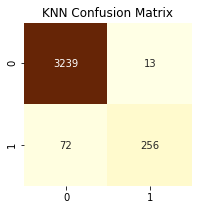


MCC = 0.8497525473289824


In [40]:
y_true=y_test
y_pred_knn=knn_clf.predict(X_test)
print(classification_report(y_true, y_pred_knn))
#print(confusion_matrix(y_true, y_pred_knn))

plt.figure(figsize=(3,3))
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(y_true, y_pred_knn),cbar=False,annot=True,cmap="YlOrBr",fmt="d")
plt.show()

print()
print("MCC = {}".format(matthews_corrcoef(y_test, y_pred_knn)))

## AdaBoost

### Evaluation of best hyperparameters

In [41]:
start=time.time()

ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5), algorithm='SAMME.R', random_state=0)
parameters = {'n_estimators':randint(20,300), 
              'learning_rate':[0.1,0.5,1]
             }
ada_clf = RandomizedSearchCV(ada, parameters, cv=5, n_iter=10, scoring=mcc_scorer, n_jobs=-1, random_state=1)
ada_clf.fit(X_train,y_train)

end=time.time()
print("Total time of execution: {} seconds".format(end - start))

Total time of execution: 194.21373796463013 seconds


In [42]:
print('Best parameters found for AdaBoost:\n', ada_clf.best_params_)

Best parameters found for AdaBoost:
 {'learning_rate': 0.5, 'n_estimators': 223}


In [43]:
#print the mean test score and the standard deviation for each trial
means = ada_clf.cv_results_['mean_test_score']
stds = ada_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, ada_clf.cv_results_['params']):
    print("%0.3f (+/-%0.04f) for %r" % (mean, std * 2, params))

0.865 (+/-0.0269) for {'learning_rate': 0.5, 'n_estimators': 255}
0.866 (+/-0.0231) for {'learning_rate': 0.1, 'n_estimators': 92}
0.870 (+/-0.0180) for {'learning_rate': 0.5, 'n_estimators': 223}
0.865 (+/-0.0244) for {'learning_rate': 0.5, 'n_estimators': 164}
0.859 (+/-0.0293) for {'learning_rate': 0.5, 'n_estimators': 91}
0.866 (+/-0.0174) for {'learning_rate': 0.5, 'n_estimators': 198}
0.867 (+/-0.0310) for {'learning_rate': 0.1, 'n_estimators': 274}
0.865 (+/-0.0219) for {'learning_rate': 0.5, 'n_estimators': 272}
0.863 (+/-0.0164) for {'learning_rate': 1, 'n_estimators': 176}
0.858 (+/-0.0265) for {'learning_rate': 0.5, 'n_estimators': 70}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3252
           1       0.95      0.86      0.91       328

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.97      0.93      0.95      3580
weighted avg       0.98      0.98      0.98      3580



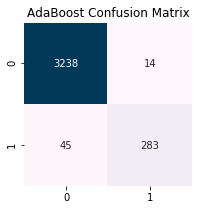


MCC = 0.8979222645926843


In [44]:
y_pred_ada=ada_clf.predict(X_test)
print(classification_report(y_true, y_pred_ada))

plt.figure(figsize=(3,3))
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(confusion_matrix(y_true, y_pred_ada),cbar=False,annot=True,cmap="PuBu",fmt="d")
plt.show()

print()
print("MCC = {}".format(matthews_corrcoef(y_test, y_pred_ada)))

## Results

From the result we get, we notice that MLPClassifier, KNN, RandomForest and AdaBoost (with Decision trees as base estimators) are the most performant models, where the latter two have the highest MCCs over the test set.<br> 
Nevertheless, we must take into account that (especially when using RandomizedSearch) not all possible combinations of hyperparameters are used, so the results can be not the best among all and the values of the metrics could change a bit.<br>
Moreover, the best model must also be chosen based on which types of error we want to allow: in this case, for example, we don't want to miss positive values, so one can choose to penalize more models that have a lot of false negatives, penalizing less false positive predictions.<br>
Finally, the time of the training/evaluation of the hyperparameters can be a determining factor in choosing which model to use: for example, RandomForest and AdaBoost have more or less the same MCC between predicted and real test values, but AdaBoost takes more than twice the time of RandomForest to select the hyperparameters.<br>
In this particular case the two most recommended models are Random Forest and AdaBoost: the latter is more slow in the evaluation of the hyperparameters but has a smaller number of false negative predictions (actually not so much but, again, the choice depends on the tolerance level we need), while Random Forest has both good performance when predicting and a reasonably lower processing time with respect to AdaBoost.